In [3]:
import sys
sys.path.append('../../')

from os import listdir

from hdf5storage import loadmat, savemat 
import numpy as np 
from matplotlib import pyplot as plt

from scipy import signal 
from hnlpy.timeop import makefiltersos
from hnlpy.timeop import narrowfilter 
from scipy.signal import sosfiltfilt
from scipy.signal import hilbert
from scipy.signal import savgol_filter

from numpy.polynomial.polynomial import polyfit, polyval

Try comparing sampling rate of 200 and 125 in one session and comparing DFA 5/5 vs 20/20

In [4]:
# load Hurst from 20/20 DFA 
# General: a single model for all
outdict = loadmat('Hurst_eeg_20_20220713.mat')
eeg_Hurst           = outdict['eeg_Hurst']        
new_sr              = outdict['new_sr']           
passbands           = outdict['passbands']        
stopbands           = outdict['stopbands']        
band_labels         = outdict['band_labels']      
filename            = outdict['filename']         
condition_index     = outdict['condition_index']  
condition_names     = outdict['condition_names']  
channels            = outdict['channels']         
channel_labels      = outdict['channel_labels']   
intervals           = outdict['intervals']        
samples             = outdict['samples']          
sessionTypes        = outdict['sessionTypes']     
session             = outdict['session']        


In [6]:
eeg_Hurst_20=eeg_Hurst

In [7]:
  # load Hurst 125
# General: a single model for all
outdict = loadmat('Hurst_eeg_125_20220713.mat')
eeg_Hurst           = outdict['eeg_Hurst']        
new_sr              = outdict['new_sr']           
passbands           = outdict['passbands']        
stopbands           = outdict['stopbands']        
band_labels         = outdict['band_labels']      
filename            = outdict['filename']         
condition_index     = outdict['condition_index']  
condition_names     = outdict['condition_names']  
channels            = outdict['channels']         
channel_labels      = outdict['channel_labels']   
intervals           = outdict['intervals']        
samples             = outdict['samples']          
sessionTypes        = outdict['sessionTypes']     
session             = outdict['session']        

In [8]:
eeg_Hurst_125=eeg_Hurst

In [9]:
  # load Hurst 200
# General: a single model for all
outdict = loadmat('Hurst_eeg_125_20220713.mat')
eeg_Hurst           = outdict['eeg_Hurst']        
new_sr              = outdict['new_sr']           
passbands           = outdict['passbands']        
stopbands           = outdict['stopbands']        
band_labels         = outdict['band_labels']      
filename            = outdict['filename']         
condition_index     = outdict['condition_index']  
condition_names     = outdict['condition_names']  
channels            = outdict['channels']         
channel_labels      = outdict['channel_labels']   
intervals           = outdict['intervals']        
samples             = outdict['samples']          
sessionTypes        = outdict['sessionTypes']     
session             = outdict['session']        

In [ ]:
eeg_Hurst_200=eeg_Hurst

In [29]:
# compare Hurst 200 5/5 and Hurst 125 5/5
mean_H_200_5=np.zeros((4,2,7,32))
mean_H_125_5=np.zeros((4,2,7,32))
for condi in range(4):
    for subj in range(2):
        mean_H_200_5[condi,subj,:,:]=np.mean(np.squeeze(eeg_Hurst_200[np.where(np.array(condition_index)==condi),subj,:,:]),axis=0)
        mean_H_125_5[condi,subj,:,:]=np.mean(np.squeeze(eeg_Hurst_125[np.where(np.array(condition_index)==condi),subj,:,:]),axis=0)

In [ ]:
# plot the comparison
for subj in range(2):
    fig, ax = plt.subplots(2,4,figsize=(6*4, 4))
    for condi in range(4):
        compare1=plt.sca(ax[0,condi])
        plt.imshow(mean_H_200_5[condi,subj,:,:],vmin=0.5,vmax=1,cmap=plt.cm.jet)
        plt.xlabel('channels'); plt.ylabel('frequency')
        plt.title('mean Hurst Sr200: subj '+str(subj)+' condi '+str(condi))
        plt.sca(ax[1,condi])
        compare2=plt.imshow(mean_H_125_5[condi,subj,:,:],vmin=0.5,vmax=1,cmap=plt.cm.jet)
        plt.xlabel('channels'); plt.ylabel('frequency')
        plt.title('mean Hurst Sr125: subj '+str(subj)+' condi '+str(condi))
        
    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.83, 0.15, 0.01, 0.7])

    cbar_node=fig.colorbar(compare2,cbar_ax)
    cbar_node.ax.tick_params(labelsize=10)
    cbar_node.set_label('Hurst')


In [37]:
# compare Hurst 200 5/5 and Hurst 200 20/20
mean_H_200_5=np.zeros((4,2,7,32))
mean_H_200_20=np.zeros((4,2,7,32))
for condi in range(4):
    for subj in range(2):
        mean_H_200_5[condi,subj,:,:]=np.mean(np.squeeze(eeg_Hurst_200[np.where(np.array(condition_index)==condi),subj,:,:]),axis=0)
        mean_H_200_20[condi,subj,:,:]=np.mean(np.squeeze(eeg_Hurst_20[np.where(np.array(condition_index)==condi),subj,:,:]),axis=0)

In [ ]:
# plot the comparison
for subj in range(2):
    fig, ax = plt.subplots(2,4,figsize=(6*4, 4))
    for condi in range(4):
        plt.sca(ax[0,condi])
        plt.imshow(mean_H_200_5[condi,subj,:,:],vmin=0.5,vmax=1,cmap='jet')
        plt.xlabel('channels'); plt.ylabel('frequency')
        plt.title('mean Hurst DFA 5/5 Sr200: subj '+str(subj)+' condi '+str(condi))
        plt.sca(ax[1,condi])
        compare2=plt.imshow(mean_H_200_20[condi,subj,:,:],vmin=0.5,vmax=1,cmap='jet')
        plt.xlabel('channels'); plt.ylabel('frequency')
        plt.title('mean Hurst DFA 20/20 Sr200: subj '+str(subj)+' condi '+str(condi))

    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.83, 0.15, 0.01, 0.7])

    cbar_node=fig.colorbar(compare2,cbar_ax)
    cbar_node.ax.tick_params(labelsize=10)
    cbar_node.set_label('Hurst')

Comparing with time sequence and state index in 12 sessions

In [1]:
# organize file in time sequence
# filedir="../../"
# pathname = 'Cleaned_data/'
filedates=[20220713,20220721,20220804,20220808,20220810,20220811,20220815,20220816,20221003,2022100401,2022100402,20221005]
numSes=len(filedates)

comparing Hurst_eeg

In [4]:
# test in one file
ses=1
outdict = loadmat('Hurst_eeg_20_'+str(filedates[ses])+'.mat')
eeg_Hurst           = outdict['eeg_Hurst']          # 12x2x7x32
new_sr              = outdict['new_sr']             
passbands           = outdict['passbands']          
stopbands           = outdict['stopbands']          
band_labels         = outdict['band_labels']        
filename            = outdict['filename']           
condition_index     = outdict['condition_index']    # 12
condition_names     = outdict['condition_names']    
channels            = outdict['channels']           
channel_labels      = outdict['channel_labels']     
intervals           = outdict['intervals']          # 12x175x2
samples             = outdict['samples']            # 12x175x2
sessionTypes        = outdict['sessionTypes']       
session             = outdict['session']            # 12

In [21]:
# put everything in 144 first dimenstion 
eeg_Hurst144x2       =np.zeros((144,2,7,32))
condition_index144   =np.zeros((144))
intervals144         =dict()
samples144           =dict()
session144           =np.zeros((144))
n=0
for ses in range(12):
    outdict = loadmat('Hurst_eeg_20_'+str(filedates[ses])+'.mat')
    eeg_Hurst           = outdict['eeg_Hurst']          # 12x2x7x32
    condition_index     = outdict['condition_index']    # 12
    intervals           = outdict['intervals']          # 12x175x2
    samples             = outdict['samples']            # 12x175x2
    session             = outdict['session']            # 12
    for trl in range(12):
        condition_index144[n]     = condition_index[trl]    # 12
        intervals144[str(n)]      = intervals[trl]
        samples144[str(n)]        = samples[trl]
        session144[n]             = session[trl]
        for subj in range(2):
            eeg_Hurst144x2[n,subj]       = eeg_Hurst[trl,subj,:,:]
        n+=1

outdict = dict()
outdict['eeg_Hurst144x2']       = eeg_Hurst144x2
outdict['condition_index144']   = condition_index144
outdict['intervals144']         = intervals144
outdict['samples144']           = samples144
outdict['session144']           = session144
savemat('Hurst_eeg144',outdict,store_python_metadata = True) 


In [132]:
np.shape(np.mean(np.concatenate((eeg_Hurst144x2[Uncoupled_synch_ind,0,:,:], eeg_Hurst144x2[Uncoupled_synch_ind,1,:,:]),axis=0),axis=0))

(7, 32)

In [135]:
eeg_Hurst144x2 # 144x2x7x32 
eeg_H_mean=np.zeros((2,4,7,32)) # 2 syn types x 4 condi x 7 freq x 32 chan

# Uncoupled
eeg_H_mean[0,0,:,:]=np.mean(np.concatenate((eeg_Hurst144x2[Uncoupled_synch_ind,0,:,:], \
                                        eeg_Hurst144x2[Uncoupled_synch_ind,1,:,:]),axis=0),axis=0)
eeg_H_mean[1,0,:,:]=np.mean(np.concatenate((eeg_Hurst144x2[Uncoupled_synco_ind,0,:,:], \
                                        eeg_Hurst144x2[Uncoupled_synco_ind,1,:,:]),axis=0),axis=0)

# Leading for L&R
eeg_H_mean[0,1,:,:]=np.mean(np.concatenate((eeg_Hurst144x2[L_lead_synch_ind,0,:,:],\
                                        eeg_Hurst144x2[R_lead_synch_ind,1,:,:]),axis=0),axis=0)
eeg_H_mean[1,1,:,:]=np.mean(np.concatenate((eeg_Hurst144x2[L_lead_synco_ind,0,:,:],\
                                        eeg_Hurst144x2[R_lead_synco_ind,1,:,:]),axis=0),axis=0)

# Following for L&R
eeg_H_mean[0,2,:,:]=np.mean(np.concatenate((eeg_Hurst144x2[L_lead_synch_ind,1,:,:],\
                                        eeg_Hurst144x2[R_lead_synch_ind,0,:,:]),axis=0),axis=0)
eeg_H_mean[1,2,:,:]=np.mean(np.concatenate((eeg_Hurst144x2[L_lead_synco_ind,1,:,:],\
                                        eeg_Hurst144x2[R_lead_synco_ind,0,:,:]),axis=0),axis=0)

# Mutual
eeg_H_mean[0,3,:,:]=np.mean(np.concatenate((eeg_Hurst144x2[Mutual_synch_ind,0,:,:], \
                                        eeg_Hurst144x2[Mutual_synch_ind,1,:,:]),axis=0),axis=0)
eeg_H_mean[1,3,:,:]=np.mean(np.concatenate((eeg_Hurst144x2[Mutual_synco_ind,0,:,:], \
                                        eeg_Hurst144x2[Mutual_synco_ind,1,:,:]),axis=0),axis=0)




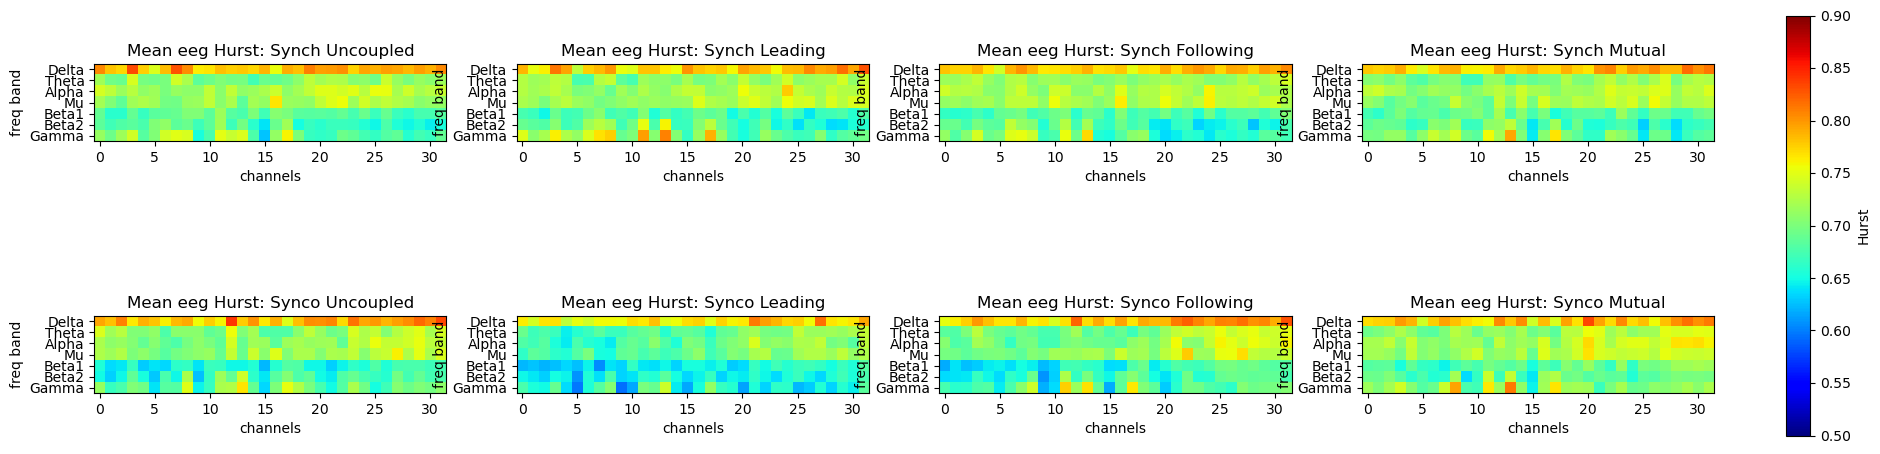

In [200]:
# plot 2 syn x 4 condi 
# (note "condition" of leading and following here is different from 
# "condition" of L-lead and R-lead in the experiment design)
fig, ax = plt.subplots(2,4,figsize=(6*4, 6))
for syn in range(2):
    for condi in range(4):
        plt.sca(ax[syn,condi])
        compare1=plt.imshow(eeg_H_mean[syn,condi,:,:],vmin=0.5,vmax=0.9,cmap=plt.cm.jet)
        plt.xlabel('channels'); plt.ylabel('freq band')
        plt.yticks(np.arange(7),band_labels,rotation=0)
        plt.title('Sr200: subj '+str(subj)+' condi '+str(condi))
        plt.xlabel('channels'); plt.ylabel('freq band')
        plt.title('Mean eeg Hurst: '+syn2names[syn]+' '+states4names[condi])
    
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.83, 0.15, 0.01, 0.7])
cbar_node=fig.colorbar(compare1,cbar_ax)
cbar_node.ax.tick_params(labelsize=10)
cbar_node.set_label('Hurst')

comparing Correlation

In [22]:
# test in one file 
ses=1
outdict = loadmat('Corr_eeg_200_'+str(filedates[ses])+'.mat')

eeg_empirical_correlation   =outdict['eeg_empirical_correlation']   # 12X2X7X32X32
eeg_partial_correlation     =outdict['eeg_partial_correlation']     # 12X2X7X32X32
new_sr                      =outdict['new_sr']                      
passbands                   =outdict['passbands']                   
stopbands                   =outdict['stopbands']                   
band_labels                 =outdict['band_labels']                 
filename                    =outdict['filename']                    
condition_index             =outdict['condition_index']             # 12
condition_names             =outdict['condition_names']             
channels                    =outdict['channels']                    
channel_labels              =outdict['channel_labels']              
intervals                   =outdict['intervals']                   # 12x175x2
samples                     =outdict['samples']                     # 12x175x2
sessionTypes                =outdict['sessionTypes']
session                     =outdict['session']                     # 12



In [23]:
# put everything in 144 first dimenstion 
eeg_empirical_correlation144x2   =np.zeros((144,2,7,32,32))
eeg_partial_correlation144x2     =np.zeros((144,2,7,32,32))
condition_index144   =np.zeros((144))
intervals144         =dict()
samples144           =dict()
session144           =np.zeros((144))
n=0
for ses in range(12):
    outdict = loadmat('Corr_eeg_200_'+str(filedates[ses])+'.mat')
    eeg_empirical_correlation    = outdict['eeg_empirical_correlation']          # 12x2x7x32x32
    eeg_partial_correlation      = outdict['eeg_partial_correlation']            # 12x2x7x32x32
    condition_index     = outdict['condition_index']    # 12
    intervals           = outdict['intervals']          # 12x175x2
    samples             = outdict['samples']            # 12x175x2
    session             = outdict['session']            # 12
    for trl in range(12):
        condition_index144[n]     = condition_index[trl]    # 12
        intervals144[str(n)]      = intervals[trl]
        samples144[str(n)]        = samples[trl]
        session144[n]             = session[trl]
        for subj in range(2):
            eeg_empirical_correlation144x2[n,subj,:,:,:]     = eeg_empirical_correlation[trl,subj,:,:,:]
            eeg_partial_correlation144x2[n,subj,:,:,:]       = eeg_partial_correlation[trl,subj,:,:,:]
        n+=1

outdict = dict()
outdict['eeg_empirical_correlation144x2']     = eeg_empirical_correlation144x2
outdict['eeg_partial_correlation144x2']       = eeg_partial_correlation144x2
outdict['condition_index144']   = condition_index144
outdict['intervals144']         = intervals144
outdict['samples144']           = samples144
outdict['session144']           = session144
savemat('Corr_eeg144',outdict,store_python_metadata = True) 


In [150]:
eeg_partial_correlation144x2 # 144x2x7x32x32
eeg_pcorr_mean2x4x7=np.zeros((2,4,7,32,32)) # 2 syn types x 4 condi x 7 freq x 32 chan

for freq in range(7):
    # Uncoupled
    eeg_pcorr_mean2x4x7[0,0,freq,:,:]=np.mean(np.concatenate((eeg_partial_correlation144x2[Uncoupled_synch_ind,0,freq,:,:], \
                                            eeg_partial_correlation144x2[Uncoupled_synch_ind,1,freq,:,:]),axis=0),axis=0)
    eeg_pcorr_mean2x4x7[1,0,freq,:,:]=np.mean(np.concatenate((eeg_partial_correlation144x2[Uncoupled_synco_ind,0,freq,:,:], \
                                            eeg_partial_correlation144x2[Uncoupled_synco_ind,1,freq,:,:]),axis=0),axis=0)

    # Leading for L&R
    eeg_pcorr_mean2x4x7[0,1,freq,:,:]=np.mean(np.concatenate((eeg_partial_correlation144x2[L_lead_synch_ind,0,freq,:,:],\
                                            eeg_partial_correlation144x2[R_lead_synch_ind,1,freq,:,:]),axis=0),axis=0)
    eeg_pcorr_mean2x4x7[1,1,freq,:,:]=np.mean(np.concatenate((eeg_partial_correlation144x2[L_lead_synco_ind,0,freq,:,:],\
                                            eeg_partial_correlation144x2[R_lead_synco_ind,1,freq,:,:]),axis=0),axis=0)

    # Following for L&R
    eeg_pcorr_mean2x4x7[0,2,freq,:,:]=np.mean(np.concatenate((eeg_partial_correlation144x2[L_lead_synch_ind,1,freq,:,:],\
                                            eeg_partial_correlation144x2[R_lead_synch_ind,0,freq,:,:]),axis=0),axis=0)
    eeg_pcorr_mean2x4x7[1,2,freq,:,:]=np.mean(np.concatenate((eeg_partial_correlation144x2[L_lead_synco_ind,1,freq,:,:],\
                                            eeg_partial_correlation144x2[R_lead_synco_ind,0,freq,:,:]),axis=0),axis=0)

    # Mutual
    eeg_pcorr_mean2x4x7[0,3,freq,:,:]=np.mean(np.concatenate((eeg_partial_correlation144x2[Mutual_synch_ind,0,freq,:,:], \
                                            eeg_partial_correlation144x2[Mutual_synch_ind,1,freq,:,:]),axis=0),axis=0)
    eeg_pcorr_mean2x4x7[1,3,freq,:,:]=np.mean(np.concatenate((eeg_partial_correlation144x2[Mutual_synco_ind,0,freq,:,:], \
                                            eeg_partial_correlation144x2[Mutual_synco_ind,1,freq,:,:]),axis=0),axis=0)



In [166]:
# construct full edges_list
edges_list=list() # each edge is a two element tuple
for i in range(32):
    for j in range(32):
        if i<j: # use indicies to remove half of edges and colors and the diagonal
            edges_list.append((i,j))

In [182]:
# mat1=eeg_partial_correlation144x2[Uncoupled_synch_ind,0,freq,:,:]
# mat2=eeg_partial_correlation144x2[Uncoupled_synch_ind,1,freq,:,:]
def cal_mean_sem_all_edg(mat1,mat2):
    # this function compute the mean and se for each edge
    trl_pcorr=np.concatenate((mat1,mat2),axis=0)
    mean_trl_pcorr=np.mean(trl_pcorr,axis=0)
    sem_trl_pcorr=sem(trl_pcorr)
    # select the value from each edge and append them into one dimention
    mean_trl_pcorr_all_edg=list()
    sem_trl_pcorr_all_edg=list()
    for i in range(32):
        for j in range(32):
            if i<j: # use indicies to remove half of edges and colors and the diagonal
                mean_trl_pcorr_all_edg.append(mean_trl_pcorr[i,j])
                sem_trl_pcorr_all_edg.append(sem_trl_pcorr[i,j])
    return mean_trl_pcorr_all_edg, sem_trl_pcorr_all_edg


In [188]:
# mean and sem in number of edges 
eeg_partial_correlation144x2 # 144x2x7x32x32
eeg_pcorr_edges_mean2x4x7=np.zeros((2,4,7,496)) # 2 syn types x 4 condi x 7 freq x 496 edges
eeg_pcorr_edges_sem2x4x7=np.zeros((2,4,7,496)) # 2 syn types x 4 condi x 7 freq x 496 edges

for freq in range(7):
    # Uncoupled
    mat1=eeg_partial_correlation144x2[Uncoupled_synch_ind,0,freq,:,:]
    mat2=eeg_partial_correlation144x2[Uncoupled_synch_ind,1,freq,:,:]
    eeg_pcorr_edges_mean2x4x7[0,0,freq,:],eeg_pcorr_edges_sem2x4x7[0,0,freq,:]=cal_mean_sem_all_edg(mat1,mat2)
    mat1=eeg_partial_correlation144x2[Uncoupled_synco_ind,0,freq,:,:]
    mat2=eeg_partial_correlation144x2[Uncoupled_synco_ind,1,freq,:,:]
    eeg_pcorr_edges_mean2x4x7[1,0,freq,:],eeg_pcorr_edges_sem2x4x7[1,0,freq,:]=cal_mean_sem_all_edg(mat1,mat2)

    # Leading for L&R
    mat1=eeg_partial_correlation144x2[L_lead_synch_ind,0,freq,:,:]
    mat2=eeg_partial_correlation144x2[R_lead_synch_ind,1,freq,:,:]
    eeg_pcorr_edges_mean2x4x7[0,1,freq,:],eeg_pcorr_edges_sem2x4x7[0,1,freq,:]=cal_mean_sem_all_edg(mat1,mat2)
    mat1=eeg_partial_correlation144x2[L_lead_synco_ind,0,freq,:,:]
    mat2=eeg_partial_correlation144x2[R_lead_synco_ind,1,freq,:,:]
    eeg_pcorr_edges_mean2x4x7[1,1,freq,:],eeg_pcorr_edges_sem2x4x7[1,1,freq,:]=cal_mean_sem_all_edg(mat1,mat2)

    # Following for L&R
    mat1=eeg_partial_correlation144x2[L_lead_synch_ind,1,freq,:,:]
    mat2=eeg_partial_correlation144x2[R_lead_synch_ind,0,freq,:,:]
    eeg_pcorr_edges_mean2x4x7[0,2,freq,:],eeg_pcorr_edges_sem2x4x7[0,2,freq,:]=cal_mean_sem_all_edg(mat1,mat2)
    mat1=eeg_partial_correlation144x2[L_lead_synco_ind,1,freq,:,:]
    mat2=eeg_partial_correlation144x2[R_lead_synco_ind,0,freq,:,:]
    eeg_pcorr_edges_mean2x4x7[1,2,freq,:],eeg_pcorr_edges_sem2x4x7[1,2,freq,:]=cal_mean_sem_all_edg(mat1,mat2)

    # Mutual
    mat1=eeg_partial_correlation144x2[Mutual_synch_ind,0,freq,:,:]
    mat2=eeg_partial_correlation144x2[Mutual_synch_ind,1,freq,:,:]
    eeg_pcorr_edges_mean2x4x7[0,3,freq,:],eeg_pcorr_edges_sem2x4x7[0,3,freq,:]=cal_mean_sem_all_edg(mat1,mat2)
    mat1=eeg_partial_correlation144x2[Mutual_synco_ind,0,freq,:,:]
    mat2=eeg_partial_correlation144x2[Mutual_synco_ind,1,freq,:,:]
    eeg_pcorr_edges_mean2x4x7[1,3,freq,:],eeg_pcorr_edges_sem2x4x7[1,3,freq,:]=cal_mean_sem_all_edg(mat1,mat2)



In [210]:
str(channel_labels[edges_list[199][0]])+'_____'+str(channel_labels[edges_list[199][1]])

"[' 8-F8']_____['12-FC6']"

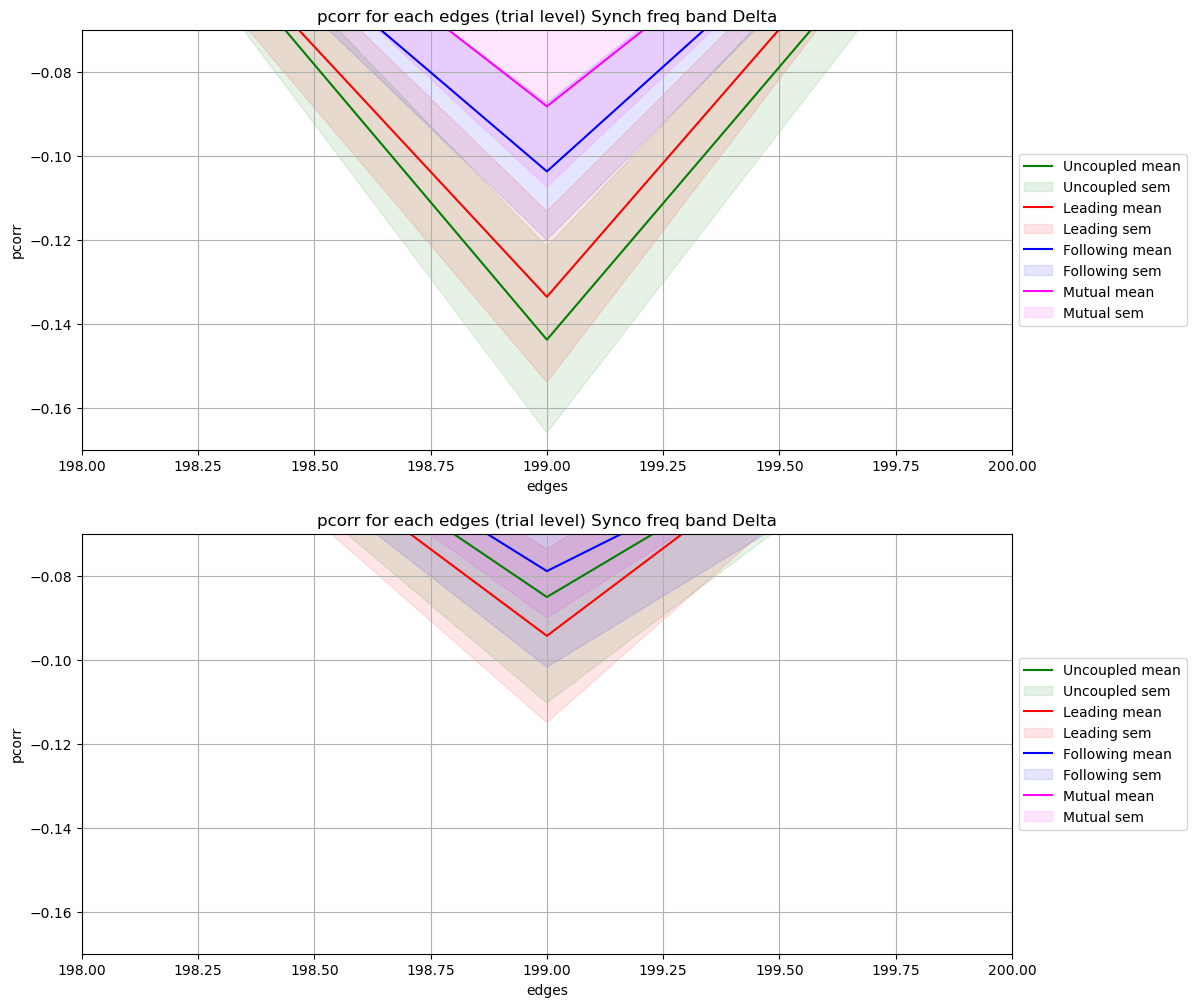

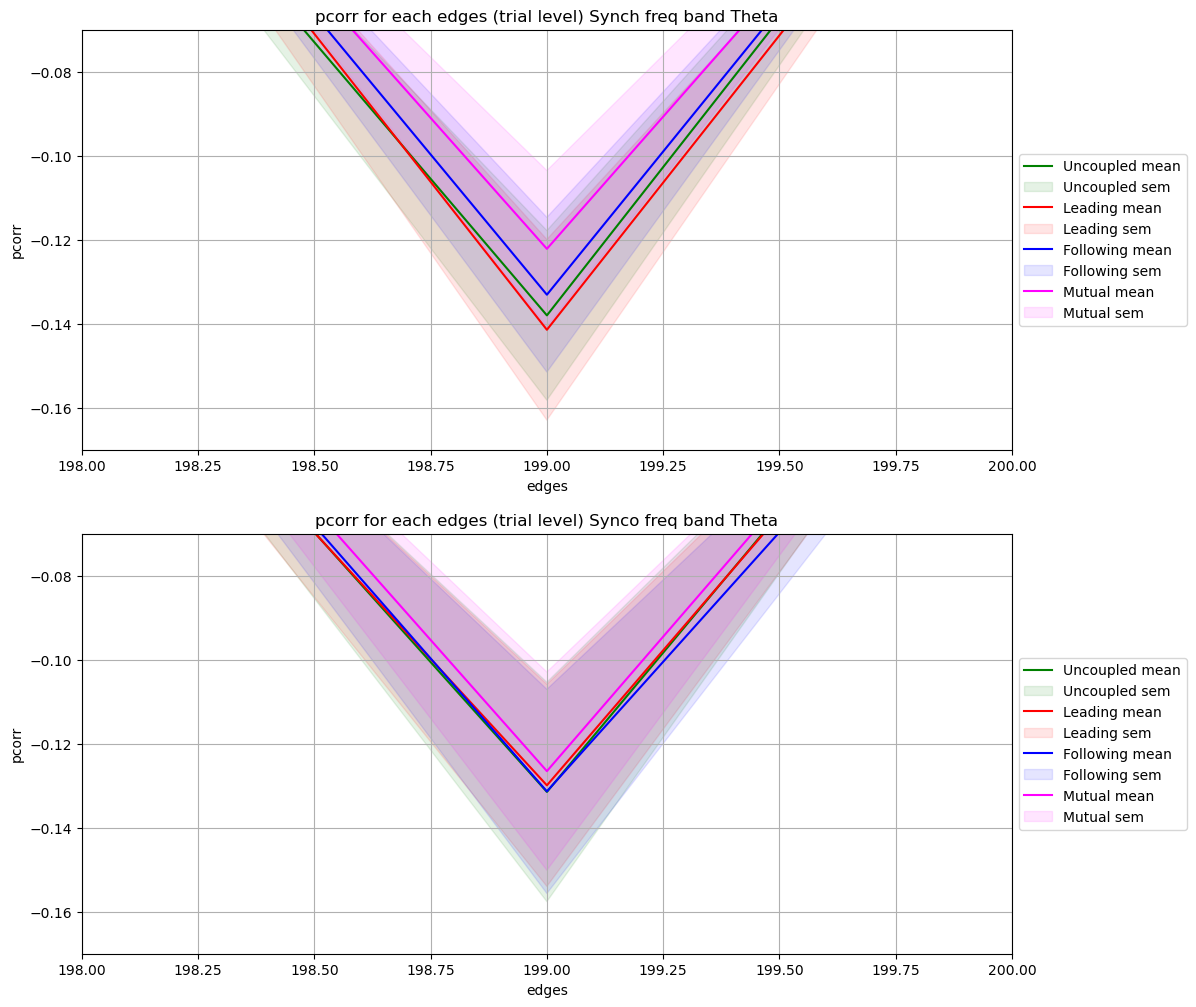

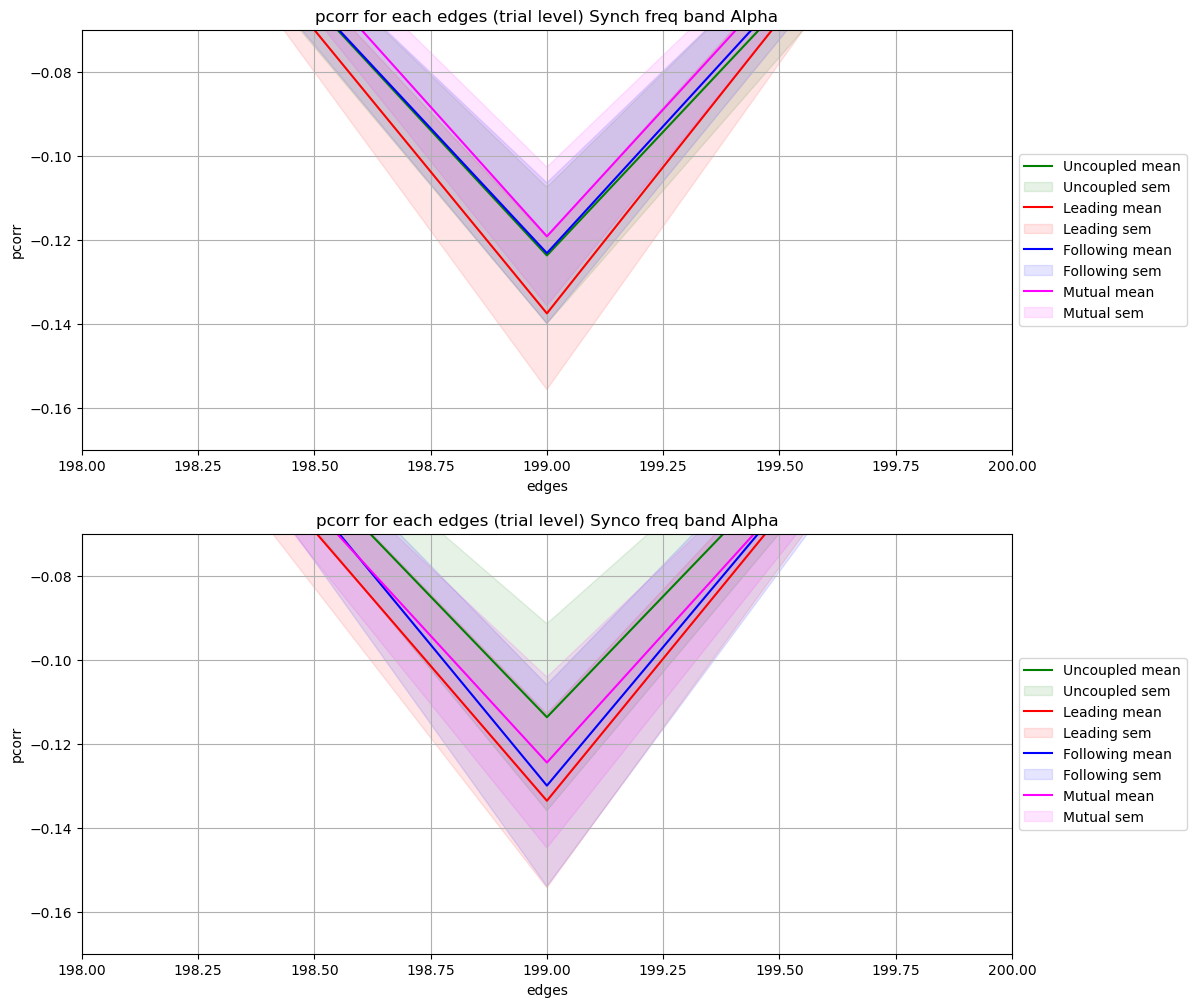

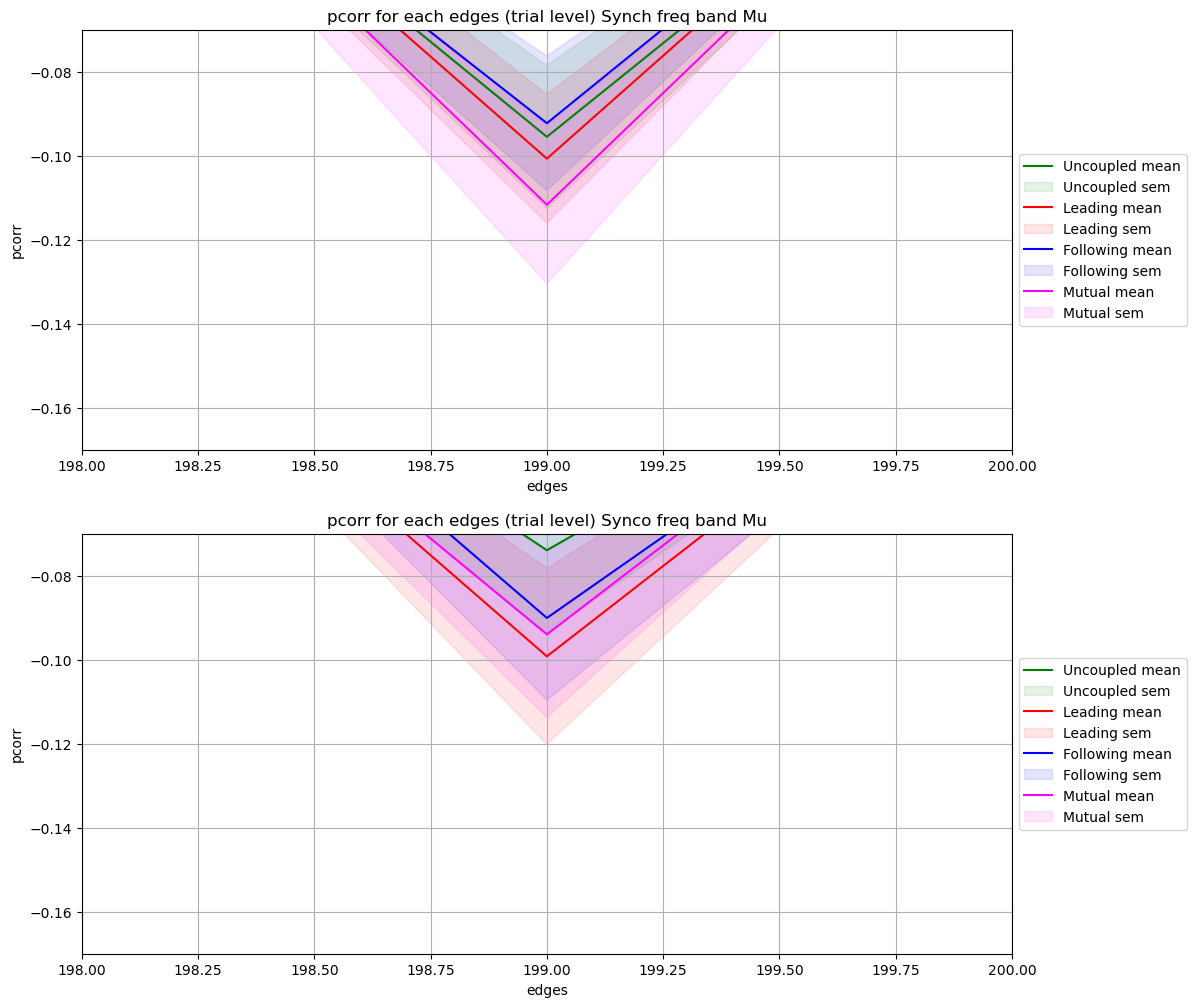

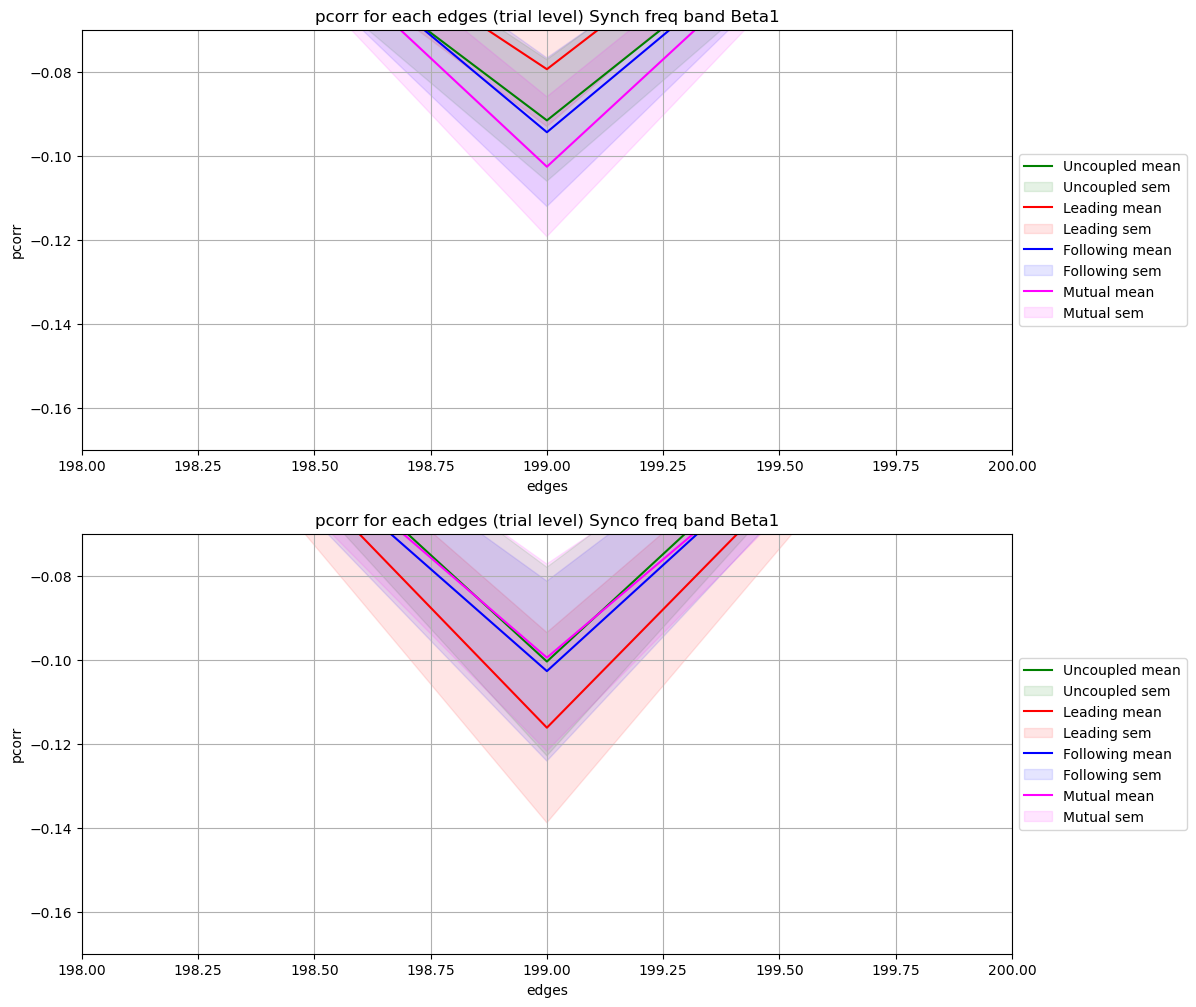

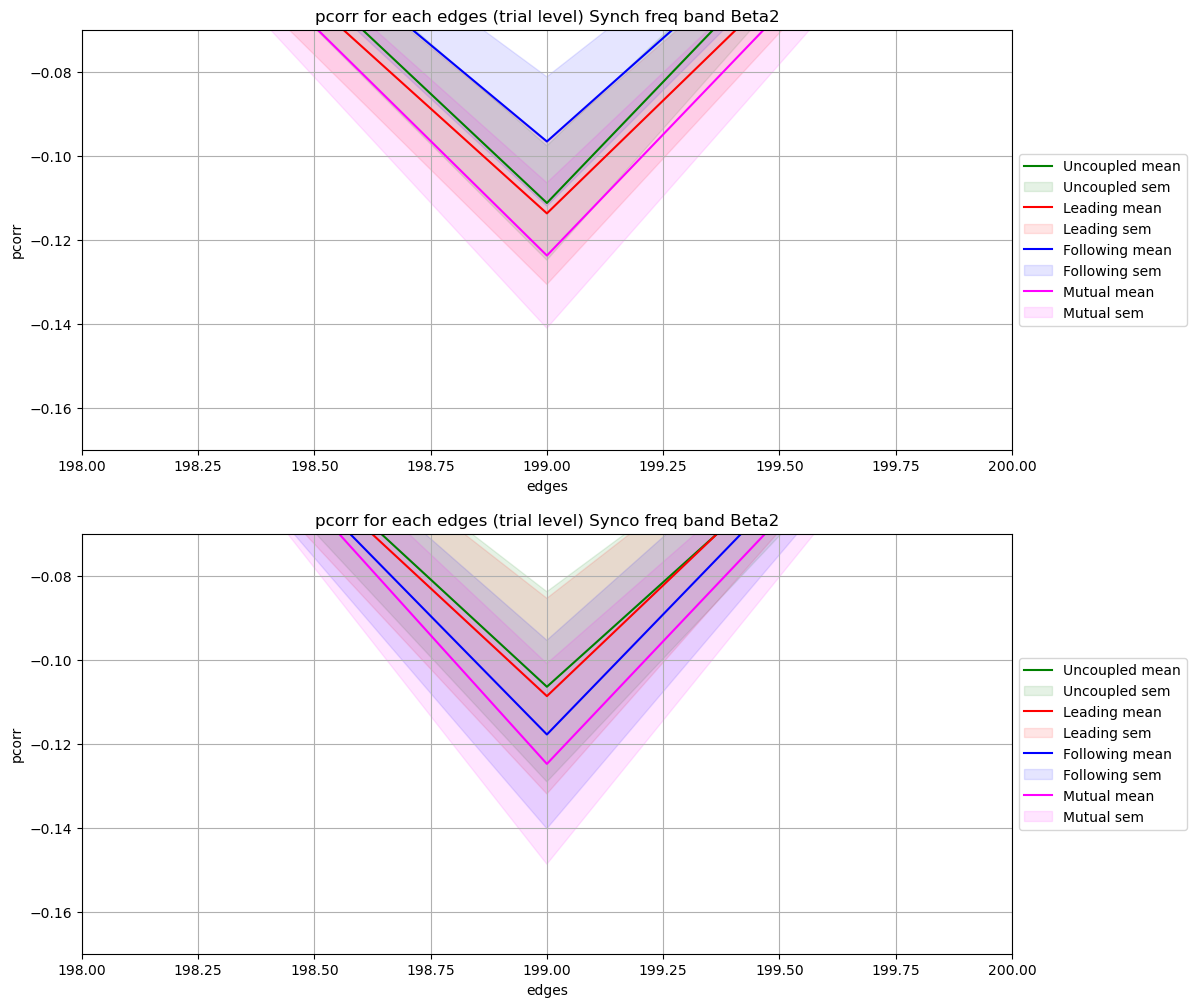

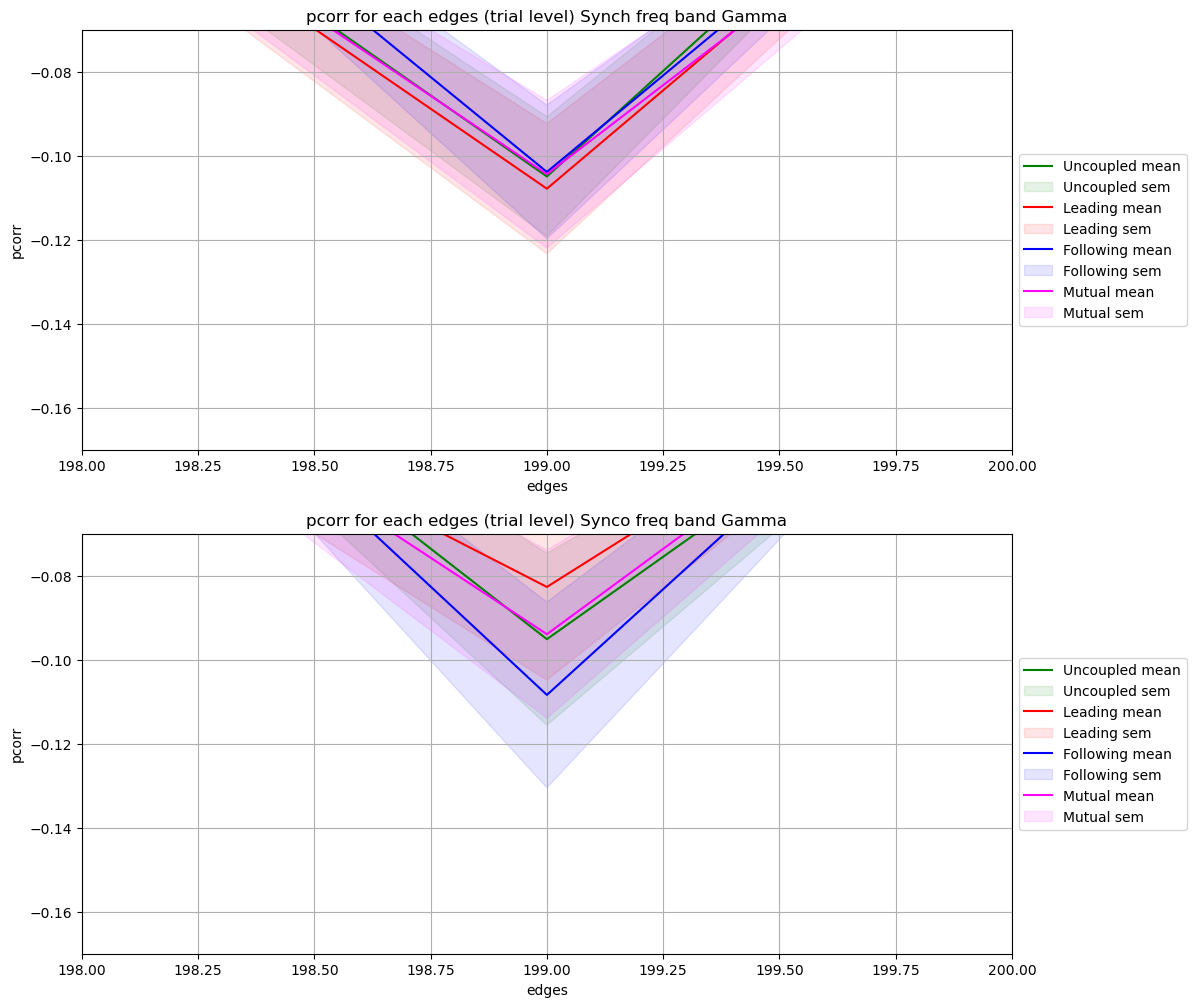

In [212]:
# plot number of edges with sem
color_4st=['green','red','blue','black']
for freq in range(7):
    fig, ax = plt.subplots(2,1,figsize=(6*2, 6*2))
    for syn in range(2):
        plt.sca(ax[syn])
        for st in range(4):
            plt.plot (np.arange(496),eeg_pcorr_edges_mean2x4x7[syn,st,freq,:],color=condicolors[st])
            plt.fill_between(np.arange(496),eeg_pcorr_edges_mean2x4x7[syn,st,freq,:]-eeg_pcorr_edges_sem2x4x7[syn,st,freq,:],\
                            eeg_pcorr_edges_mean2x4x7[syn,st,freq,:]+eeg_pcorr_edges_sem2x4x7[syn,st,freq,:],\
                                color=condicolors[st], alpha=.1)

        plt.xlabel("edges")
        plt.ylabel("pcorr")
        plt.xlim(198,200)
        plt.ylim(-0.17,-0.07)


        plt.title('pcorr for each edges (trial level) '+syn2names[syn]+' freq band '+ band_labels[freq])
        plt.grid()

        plt.legend(['Uncoupled mean', 'Uncoupled sem', 'Leading mean', 'Leading sem',
            'Following mean', 'Following sem','Mutual mean','Mutual sem'],ncol=1,
            loc='center left', bbox_to_anchor=(1, 0.5))

organize behaviral H into 144 x 2

In [24]:
# load data of the 4 states
outdict=loadmat('H_all.mat')
H_all=outdict["H_all"]      # 2x12x12


In [35]:
# put H_all into 144 first dimention
H144=np.zeros((144,2))
n=0
for ses in range(12):
    for trl in range(12):
        H144[n,0]=H_all[0,ses,trl]
        H144[n,1]=H_all[1,ses,trl]
        n+=1


In [36]:
outdict = dict()
outdict['H144'] = H144
savemat('H144',outdict,store_python_metadata = True) 

comparing conditions

In [49]:
synch_ind=np.where(session144==1)
synco_ind=np.where(session144==2)

In [48]:
Uncoupled_ind=np.where(condition_index144==0)
L_lead_ind   =np.where(condition_index144==1)
R_lead_ind   =np.where(condition_index144==2)
Mutual_ind   =np.where(condition_index144==3)
print(Uncoupled_ind)
print(L_lead_ind)
print(R_lead_ind)
print(Mutual_ind)

(array([  3,   7,  11,  15,  19,  23,  26,  28,  32,  38,  40,  44,  50,
        53,  56,  62,  65,  68,  75,  78,  80,  87,  90,  92,  96, 102,
       106, 108, 114, 118, 121, 125, 130, 133, 137, 142]),)
(array([  0,   5,  10,  12,  17,  22,  27,  31,  34,  39,  43,  46,  51,
        52,  58,  63,  64,  70,  72,  77,  81,  84,  89,  93,  97, 100,
       105, 109, 112, 117, 123, 126, 128, 135, 138, 140]),)
(array([  1,   4,   8,  13,  16,  20,  24,  29,  33,  36,  41,  45,  49,
        54,  59,  61,  66,  71,  73,  76,  82,  85,  88,  94,  99, 101,
       107, 111, 113, 119, 120, 124, 129, 132, 136, 141]),)
(array([  2,   6,   9,  14,  18,  21,  25,  30,  35,  37,  42,  47,  48,
        55,  57,  60,  67,  69,  74,  79,  83,  86,  91,  95,  98, 103,
       104, 110, 115, 116, 122, 127, 131, 134, 139, 143]),)


In [50]:
# Uncoupled condition in Synch for L&R
Uncoupled_synch_ind=np.intersect1d(synch_ind,Uncoupled_ind)
# Uncoupled condition in Synco for L&R
Uncoupled_synco_ind=np.intersect1d(synco_ind,Uncoupled_ind)

In [51]:
# Mutual condition in Synch for L&R
Mutual_synch_ind=np.intersect1d(synch_ind,Mutual_ind)
# Mutual condition in Synco for L&R
Mutual_synco_ind=np.intersect1d(synco_ind,Mutual_ind)

In [56]:
# L_Leading in Synch / R_following in Synch
L_lead_synch_ind=np.intersect1d(synch_ind,L_lead_ind)
# R_leading in Synch / L_following in Synch
R_lead_synch_ind=np.intersect1d(synch_ind,R_lead_ind)
# L_Leading in Synco / R_following in Synco
L_lead_synco_ind=np.intersect1d(synco_ind,L_lead_ind)
# R_leading in Synco / L_following in Synco
R_lead_synco_ind=np.intersect1d(synco_ind,R_lead_ind)


In [151]:
# parameters for plotting
states4names=['Uncoupled','Leading','Following','Mutual']
syn2names=['Synch','Synco']

In [65]:
# condition_index144 
from scipy.stats import sem
H_means=np.zeros((2,4))
H_sems=np.zeros((2,4))

# Uncoupled
H_means[0,0]=np.mean(H144[Uncoupled_synch_ind,:])
H_means[1,0]=np.mean(H144[Uncoupled_synco_ind,:])

# Leading for L&R
H_means[0,1]=np.mean(np.concatenate((H144[L_lead_synch_ind,0],H144[R_lead_synch_ind,1])))
H_means[1,1]=np.mean(np.concatenate((H144[L_lead_synco_ind,0],H144[R_lead_synco_ind,1])))

# Following for L&R
H_means[0,2]=np.mean(np.concatenate((H144[L_lead_synch_ind,1],H144[R_lead_synch_ind,0])))
H_means[1,2]=np.mean(np.concatenate((H144[L_lead_synco_ind,1],H144[R_lead_synco_ind,0])))

# Mutual
H_means[0,3]=np.mean(H144[Mutual_synch_ind,:])
H_means[1,3]=np.mean(H144[Mutual_synco_ind,:])

# ***********************************************************************************

# Uncoupled
H_sems[0,0]=sem(H144[Uncoupled_synch_ind,:],axis=None)
H_sems[1,0]=sem(H144[Uncoupled_synco_ind,:],axis=None)

# Leading for L&R
H_sems[0,1]=sem(np.concatenate((H144[L_lead_synch_ind,0],H144[R_lead_synch_ind,1])))
H_sems[1,1]=sem(np.concatenate((H144[L_lead_synco_ind,0],H144[R_lead_synco_ind,1])))

# Following for L&R
H_sems[0,2]=sem(np.concatenate((H144[L_lead_synch_ind,1],H144[R_lead_synch_ind,0])))
H_sems[1,2]=sem(np.concatenate((H144[L_lead_synco_ind,1],H144[R_lead_synco_ind,0])))

# Mutual
H_sems[0,3]=sem(H144[Mutual_synch_ind,:],axis=None)
H_sems[1,3]=sem(H144[Mutual_synco_ind,:],axis=None)

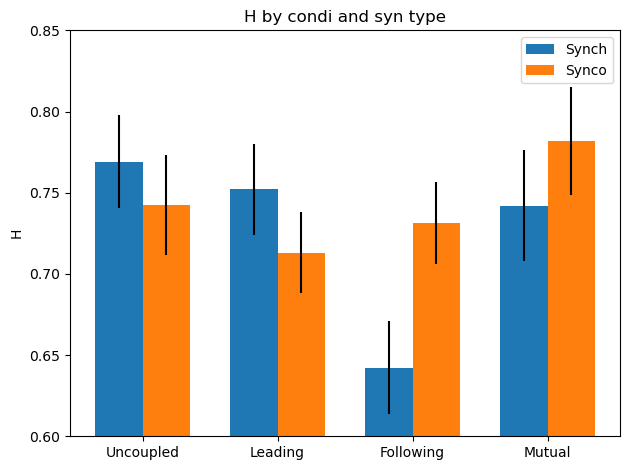

In [74]:

synch_means, synch_sem = H_means[0,:], H_sems[0,:]
synco_means, synco_sem = H_means[1,:], H_sems[1,:]

ind = np.arange(len(synch_means))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, synch_means, width, yerr=synch_sem,
                label='Synch')
rects2 = ax.bar(ind + width/2, synco_means, width, yerr=synco_sem,
                label='Synco')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('H')
ax.set_title('H by condi and syn type')
ax.set_xticks(ind)
ax.set_xticklabels(states4names)
ax.legend()

plt.ylim(0.6, 0.85)

fig.tight_layout()

plt.show()

In [80]:
# (Color Scheme) 
red         = [1, 0, 0]
pink        = [1, 0.65, 0.75]
black       = [0, 0, 0]
white       = [1, 1, 1]
blue        = [0, 0, 1]
mediumblue  = [0, 0.4, 0.7]
green       = [0, 1, 0]
darkgreen   = [0, 0.5, 0]
grey        = [0.5, 0.5, 0.5]
yellow      = [1, 1, 0]
deepyellow  = [1, 0.8, 0.2]
gold        = [212/255, 175/255, 55/255]
brown       = [150/255, 75/255, 0]
magenta     = [1, 0, 1] 
cyan        = [0, 1, 1]  
purple      = [0.6, 0.1, 0.9]
# % https://www.mathworks.com/help/matlab/creating_plots/specify-plot-colors.html
matlab_blue     = [0, 0.4470, 0.7410]
matlab_orange   = [0.8500, 0.3250, 0.0980]
matlab_gold     = [0.9290, 0.6940, 0.1250]
matlab_purple   = [0.4940, 0.1840, 0.5560]
matlab_green    = [0.4660, 0.6740, 0.1880]
matlab_cyan     = [0.3010, 0.7450, 0.9330]
matlab_red      = [0.6350, 0.0780, 0.1840]

# combine colors
condicolors = [darkgreen, red, blue, magenta, purple, purple]
dire3colors = [darkgreen, brown, magenta]
syn2colors = [darkgreen, pink]
HNLcolors = [darkgreen, deepyellow, pink]


In [126]:
def polyfit_plotline(x,y,color_array,label_name):
    plt.plot(x,y,'.', color=color_array)
    A = np.polyfit(x, y, 1)
    Alpha1 = A[0]
    FitValues = np.polyval(A, x)
    RHO = np.corrcoef(x, y)
    RHO = RHO[0,1]
    plt.plot(x, FitValues, '-', color=color_array, linewidth=3,label=label_name)
    plt.text(min(x), min(FitValues)+0.025, '$\\rho$ = '+str(round(RHO,2)), color=color_array, fontsize=15)  
    plt.xlim(0.2,1.4)
    plt.ylim(0.2,1.4)
    
    

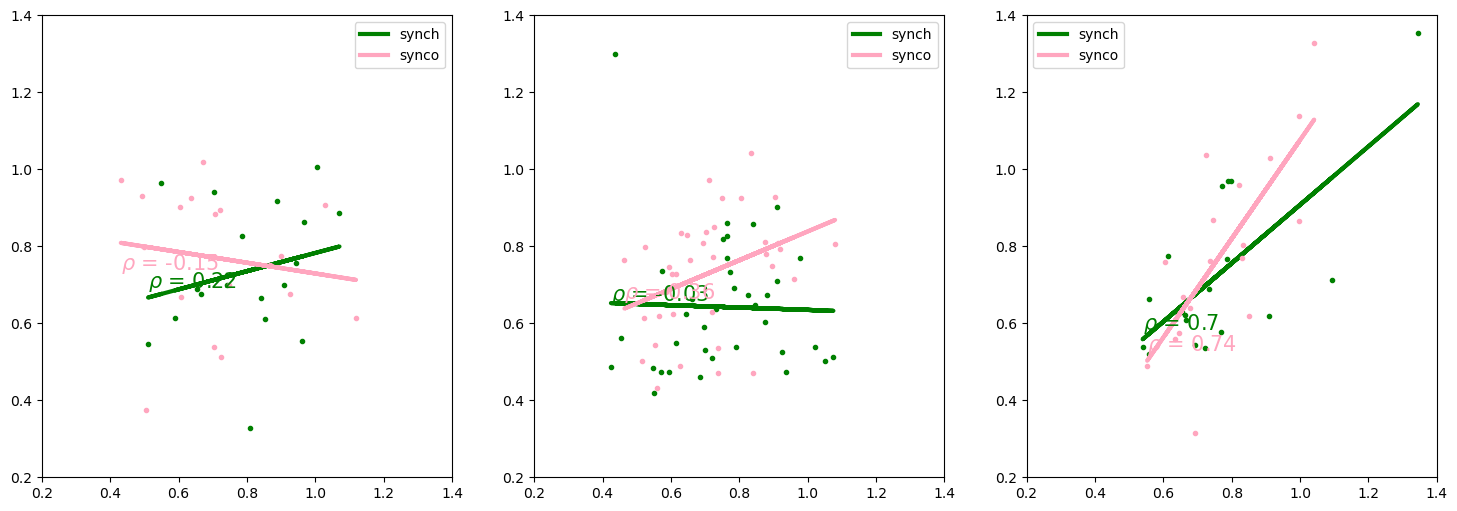

In [128]:
# pair subjects to match H in 3 states
fig, ax = plt.subplots(1,3,figsize=(6*3, 6*1))
plt.sca(ax[0])
polyfit_plotline(H144[Uncoupled_synch_ind,0],H144[Uncoupled_synch_ind,1],syn2colors[0],'synch')
polyfit_plotline(H144[Uncoupled_synco_ind,0],H144[Uncoupled_synco_ind,1],syn2colors[1],'synco')
plt.legend()

plt.sca(ax[1])
polyfit_plotline(np.concatenate((H144[L_lead_synch_ind,0],H144[R_lead_synch_ind,1])),\
                 np.concatenate((H144[L_lead_synch_ind,1],H144[R_lead_synch_ind,0])),syn2colors[0],'synch')
polyfit_plotline(np.concatenate((H144[L_lead_synco_ind,0],H144[R_lead_synco_ind,1])),\
                 np.concatenate((H144[L_lead_synco_ind,1],H144[R_lead_synco_ind,0])),syn2colors[1],'synco')
plt.legend()

plt.sca(ax[2])
polyfit_plotline(H144[Mutual_synch_ind,0],H144[Mutual_synch_ind,1],syn2colors[0],'synch')
polyfit_plotline(H144[Mutual_synco_ind,0],H144[Mutual_synco_ind,1],syn2colors[1],'synco')
plt.legend()

In [ ]:
np.concatenate((H144[L_lead_synch_ind,0],H144[R_lead_synch_ind,1]))

array([0.84715683, 0.91059502, 0.64313351, 1.05018945, 0.93652856,
       0.56987221, 0.76410236, 0.71971444, 0.75164228, 0.90992171,
       0.73173769, 0.57405971, 1.0221329 , 0.77378528, 0.82550011,
       0.54832816, 0.66197599, 0.45461253, 0.88110614, 0.873695  ,
       0.78874835, 0.76388063, 0.69768172, 0.42439824, 0.97839018,
       0.92420994, 1.07507264, 0.69960043, 0.78458444, 0.8412978 ,
       0.68392256, 0.54987521, 0.43764638, 0.76455724, 0.61444888,
       0.5948239 ])